In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('./startup-train.csv')

## Change sub_category, category, country, and target to number

In [3]:
label_enc = LabelEncoder()
df['target_code'] = label_enc.fit_transform(df['target'])
print(label_enc.classes_)

['canceled' 'failed' 'successful' 'suspended']


In [4]:
data_df = df.drop(columns=['target'])
data_df['sub_category'] = label_enc.fit_transform(df['sub_category'])
print(label_enc.classes_)
data_df['category'] = label_enc.fit_transform(df['category'])
print(label_enc.classes_)

data_df['deadline'] = pd.to_datetime(df['deadline'])
data_df['launched'] = pd.to_datetime(df['launched'])

data_df['days'] = data_df['deadline']-data_df['launched']
data_df

data_df['country'] = df['country'].replace({'N,0"': '00'}) 
data_df['country'] = label_enc.fit_transform(df['country'])
print(label_enc.classes_)
data_df

['3D Printing' 'Academic' 'Accessories' 'Action' 'Animals' 'Animation'
 'Anthologies' 'Apparel' 'Apps' 'Architecture' 'Art' 'Art Books' 'Audio'
 'Bacon' 'Blues' 'Calendars' 'Camera Equipment' 'Candles' 'Ceramics'
 "Children's Books" 'Childrenswear' 'Chiptune' 'Civic Design'
 'Classical Music' 'Comedy' 'Comic Books' 'Comics' 'Community Gardens'
 'Conceptual Art' 'Cookbooks' 'Country & Folk' 'Couture' 'Crafts'
 'Crochet' 'DIY' 'DIY Electronics' 'Dance' 'Design' 'Digital Art'
 'Documentary' 'Drama' 'Drinks' 'Electronic Music' 'Embroidery' 'Events'
 'Experimental' 'Fabrication Tools' 'Faith' 'Family' 'Fantasy'
 "Farmer's Markets" 'Farms' 'Fashion' 'Festivals' 'Fiction' 'Film & Video'
 'Fine Art' 'Flight' 'Food' 'Food Trucks' 'Footwear' 'Gadgets' 'Games'
 'Gaming Hardware' 'Glass' 'Graphic Design' 'Graphic Novels' 'Hardware'
 'Hip-Hop' 'Horror' 'Illustration' 'Immersive' 'Indie Rock'
 'Installations' 'Interactive Design' 'Jazz' 'Jewelry' 'Journalism' 'Kids'
 'Knitting' 'Latin' 'Letterpress'

sub_category  category   deadline            launched  backers  \
0                 52         5 2016-05-25 2016-04-25 16:09:19        1   
1                 74         4 2014-09-27 2014-08-28 05:19:04        3   
2                 92        14 2015-07-12 2015-05-13 09:04:55        7   
3                 19        12 2016-03-21 2016-02-20 23:45:40        0   
4                 52         5 2016-01-09 2015-12-02 11:24:16      131   
...              ...       ...        ...                 ...      ...   
297835           131        13 2014-10-04 2014-08-05 21:12:55        3   
297836           113         4 2016-12-10 2016-11-10 23:02:49        2   
297837           113         4 2015-06-15 2015-05-01 01:01:03      155   
297838           129         6 2014-08-22 2014-07-23 10:19:05       36   
297839           151         9 2014-12-14 2014-11-14 10:42:41        8   

        country   pledged      goal  target_code             days  
0            20      0.60   2410.19            1 29 days 07:50:41  
1             1     70.02   8751.97            1 29 days 18:40:56  
2             1    251.65   5551.03            0 59 days 14:55:05  
3            22      0.00  10000.00            0 29 days 00:14:20  
4            22  21231.00  20000.00            2 37 days 12:35:44  
...         ...       ...       ...          ...              ...  
297835       22    102.00  40000.00            1 59 days 02:47:05  
297836       22     40.00  20000.00            1 29 days 00:57:11  
297837       22  15745.00  25000.00            0 44 days 22:58:57  
297838        9   5003.68   4973.23            2 29 days 13:40:55  
297839        9    785.53  12518.39            1 29 days 13:17:19  

[297840 rows x 10 columns]

<AxesSubplot:>

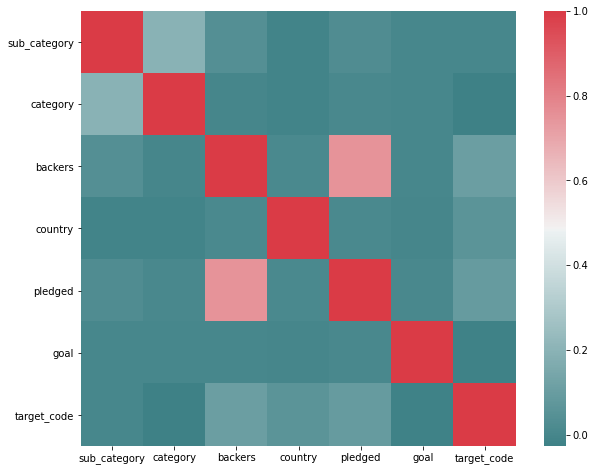

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fi, axis = plt.subplots(figsize=(10, 8))
corr = data_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(200,10,as_cmap=True), 
           square=True, ax=axis)

In [6]:
from datetime import datetime

data_df['deadline'] = pd.to_datetime(df['deadline'])

data_df['launched'] = pd.to_datetime(df['launched'], format='%Y/%m/%d').dt.date

data_df['launched']

0         2016-04-25
1         2014-08-28
2         2015-05-13
3         2016-02-20
4         2015-12-02
             ...    
297835    2014-08-05
297836    2016-11-10
297837    2015-05-01
297838    2014-07-23
297839    2014-11-14
Name: launched, Length: 297840, dtype: object

In [10]:
data_df['sub_category'] = label_enc.fit_transform(df['sub_category'])
print(label_enc.classes_)
data_df['category'] = label_enc.fit_transform(df['category'])
print(label_enc.classes_)

data_df


['3D Printing' 'Academic' 'Accessories' 'Action' 'Animals' 'Animation'
 'Anthologies' 'Apparel' 'Apps' 'Architecture' 'Art' 'Art Books' 'Audio'
 'Bacon' 'Blues' 'Calendars' 'Camera Equipment' 'Candles' 'Ceramics'
 "Children's Books" 'Childrenswear' 'Chiptune' 'Civic Design'
 'Classical Music' 'Comedy' 'Comic Books' 'Comics' 'Community Gardens'
 'Conceptual Art' 'Cookbooks' 'Country & Folk' 'Couture' 'Crafts'
 'Crochet' 'DIY' 'DIY Electronics' 'Dance' 'Design' 'Digital Art'
 'Documentary' 'Drama' 'Drinks' 'Electronic Music' 'Embroidery' 'Events'
 'Experimental' 'Fabrication Tools' 'Faith' 'Family' 'Fantasy'
 "Farmer's Markets" 'Farms' 'Fashion' 'Festivals' 'Fiction' 'Film & Video'
 'Fine Art' 'Flight' 'Food' 'Food Trucks' 'Footwear' 'Gadgets' 'Games'
 'Gaming Hardware' 'Glass' 'Graphic Design' 'Graphic Novels' 'Hardware'
 'Hip-Hop' 'Horror' 'Illustration' 'Immersive' 'Indie Rock'
 'Installations' 'Interactive Design' 'Jazz' 'Jewelry' 'Journalism' 'Kids'
 'Knitting' 'Latin' 'Letterpress'

sub_category  category   deadline    launched  backers  country  \
0                 52         5 2016-05-25  2016-04-25        1       20   
1                 74         4 2014-09-27  2014-08-28        3        1   
2                 92        14 2015-07-12  2015-05-13        7        1   
3                 19        12 2016-03-21  2016-02-20        0       22   
4                 52         5 2016-01-09  2015-12-02      131       22   
...              ...       ...        ...         ...      ...      ...   
297835           131        13 2014-10-04  2014-08-05        3       22   
297836           113         4 2016-12-10  2016-11-10        2       22   
297837           113         4 2015-06-15  2015-05-01      155       22   
297838           129         6 2014-08-22  2014-07-23       36        9   
297839           151         9 2014-12-14  2014-11-14        8        9   

         pledged      goal  target_code             days  
0           0.60   2410.19            1 29 days 07:50:41  
1          70.02   8751.97            1 29 days 18:40:56  
2         251.65   5551.03            0 59 days 14:55:05  
3           0.00  10000.00            0 29 days 00:14:20  
4       21231.00  20000.00            2 37 days 12:35:44  
...          ...       ...          ...              ...  
297835    102.00  40000.00            1 59 days 02:47:05  
297836     40.00  20000.00            1 29 days 00:57:11  
297837  15745.00  25000.00            0 44 days 22:58:57  
297838   5003.68   4973.23            2 29 days 13:40:55  
297839    785.53  12518.39            1 29 days 13:17:19  

[297840 rows x 10 columns]

fi= plt.figure(figsize=(14,5))

axis=fi.add_subplot(121)
sns.distplot(data_df[(data_df.target_code == 0)]['goal'],color='b',ax=axis)
axis.set_title('The distribution of goal with 0')

axis=fi.add_subplot(122)
sns.distplot(data_df[(data_df.target_code == 1)]['goal'],color='c',ax=axis)
axis.set_title('The distribution of goal with 1')

axis=fi.add_subplot(123)
sns.distplot(data_df[(data_df.target_code == 2)]['goal'],color='c',ax=axis)
axis.set_title('The distribution of goal with 2')

axis=fi.add_subplot(124)
sns.distplot(data_df[(data_df.target_code == 3)]['goal'],color='c',ax=axis)
axis.set_title('The distribution of goal with 3')

sns.catplot(x='pledged', y='goal', hue='target_code', kind='bar', palette="inferno", data=data_df)
plt.title('The chance of the patient to have the disease in different sex and age range')

plt.figure(figsize=(12,5))
plt.title("Box plot for num4 to check the outliers")
sns.boxplot(x="goal", data = data_df , orient="h", palette = 'pink')